In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

In [2]:
start = '2020-01-01'
end = date.today()

In [3]:
riotStock = data.DataReader("RIOT", 'yahoo', start, end)
maraStock = data.DataReader("MARA", 'yahoo', start, end)
tslaStock = data.DataReader("TSLA", 'yahoo', start, end)
googStock = data.DataReader("GOOG", 'yahoo', start, end)
amznStock = data.DataReader("AMZN", 'yahoo', start, end)

In [4]:
riotStock.to_csv("Riot Stock.csv")
maraStock.to_csv("Mara Stock.csv")
tslaStock.to_csv("Tesla Stock.csv")
googStock.to_csv("Google Stock.csv")
amznStock.to_csv("Amazon Stock.csv")

Text(0, 0.5, 'Stock Price')

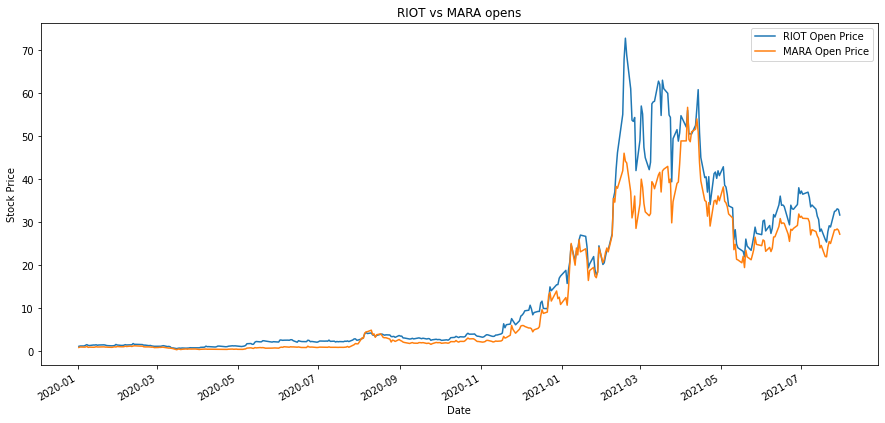

In [5]:
riotStock['Open'].plot(label = 'RIOT Open Price', figsize=(15, 7))
maraStock['Open'].plot(label = 'MARA Open Price')
plt.legend()
plt.title('RIOT vs MARA opens')
plt.ylabel('Stock Price')


Text(0, 0.5, 'Volume')

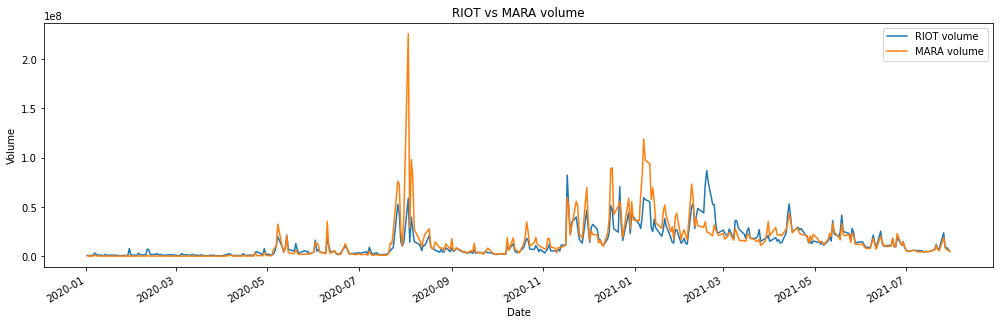

In [6]:
riotStock['Volume'].plot(label="RIOT volume", figsize=(17,5))
maraStock['Volume'].plot(label="MARA volume")
plt.legend()
plt.title('RIOT vs MARA volume')
plt.ylabel('Volume')

In [7]:
riotStock['Total Traded'] = riotStock['Open']*riotStock['Volume'] 
maraStock['Total Traded'] = riotStock['Open']*maraStock['Volume'] 

Text(0, 0.5, 'Total Traded')

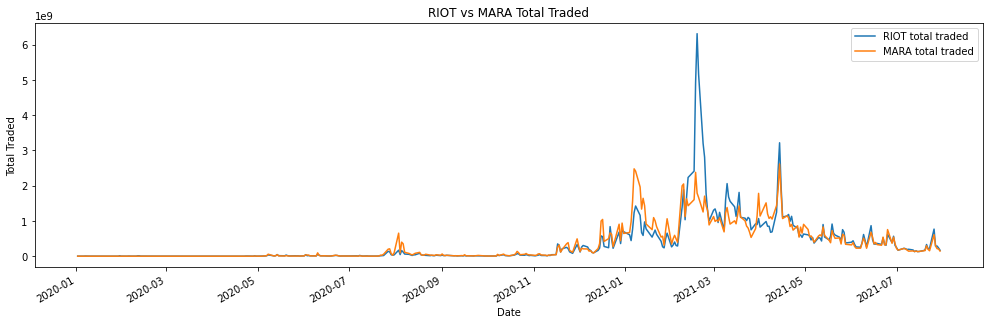

In [8]:
riotStock['Total Traded'].plot(label="RIOT total traded", figsize=(17,5))
maraStock['Total Traded'].plot(label="MARA total traded")
plt.legend()
plt.title('RIOT vs MARA Total Traded')
plt.ylabel('Total Traded')

In [9]:
riotStock.iloc[riotStock['Total Traded'].argmax()]

High            7.875000e+01
Low             5.877000e+01
Open            7.276000e+01
Close           6.203000e+01
Volume          8.679610e+07
Adj Close       6.203000e+01
Total Traded    6.315284e+09
Name: 2021-02-18 00:00:00, dtype: float64

Moving Average is a smoothing method for when data is unreliable (large changes in short periods of time). Higher moving average may ignore trends, but too small sends us back to the noisy observations issue. Need a perfect balance. Look at auto-regression.


KeyError: 'MA200'

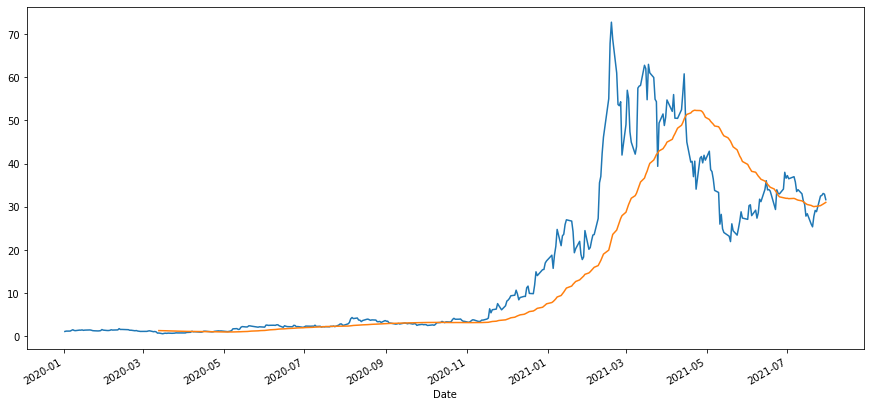

In [13]:
riotStock['Open'].plot(label="Open", figsize=(15,7))
riotStock['MA50'] = riotStock['Open'].rolling(50).mean()
riotStock['MA50'].plot(label="MA50")
riotStock['MA200'] = riotStock['Open'].rolling(200).mean()
riotStock['MA200'].plot(label="MA200")
plt.legend()